# The place where the best data in the wordl is collected:

In [37]:
import numpy as np
import pandas as pd
import os
os.getcwd()


'/Users/CedricESMT/ESMT/Term 1/Data wrangling/data_wrangling_team_pluto'

In [39]:
path = '/Users/CedricESMT/ESMT/Term 1/Data wrangling/data_wrangling_team_pluto'
df = pd.read_csv(f'{path}/ghg-emissions.csv')
df.head()

,iso,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CHN,China,MtCO2e,3049.87,3196.90,3338.53,3581.08,3751.23,4148.03,4164.03,...,11175.26,11237.61,11085.85,11135.02,11376.55,11868.70,12109.18,12263.69,12852.14,12851.84
1,USA,United States,MtCO2e,5472.89,5424.70,5506.44,5615.49,5709.34,5777.03,5947.73,...,5795.20,5845.56,5735.74,5804.37,5755.15,5972.88,5851.35,5305.85,5591.52,5670.87
2,IND,India,MtCO2e,1126.56,1181.45,1208.14,1244.03,1293.11,1361.15,1410.07,...,2947.22,3134.57,3179.00,3247.88,3367.94,3506.66,3507.03,3326.20,3584.74,3805.03
3,RUS,Russia,MtCO2e,2618.14,2550.02,2382.89,2186.50,1952.47,1876.57,1832.29,...,1603.53,1596.32,1572.12,1697.90,1746.26,1840.91,1844.30,1759.19,1939.93,1886.05
4,BRA,Brazil,MtCO2e,1675.44,1696.97,1707.24,1717.63,1734.63,1761.52,1764.33,...,1410.09,1450.30,1437.66,1524.43,1550.01,1509.63,1533.43,1537.10,1598.81,1597.22


In [ ]:
cols = df.columns.astype(str)

year_cols = [col for col in cols if col not in ['iso', 'Country/Region', 'unit']]

country_col = 'Country/Region'

id_vars = []
if 'iso' in df.columns:
    id_vars.append('iso')
if country_col:
    id_vars.append(country_col)
# ensure we have year columns and at least one id var
if not year_cols:
    raise ValueError('No year columns detected. Adjust the year detection logic.')
if not id_vars:
    raise ValueError('No id columns found (iso/country). Adjust the id column selection.')
# melt to long form
df_long = pd.melt(df, id_vars=id_vars, value_vars=year_cols, var_name='year', value_name='MtCO2e')
# convert types: year -> integer-like, MtCO2e -> numeric (coerce bad values)
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce').astype('Int64')
df_long['MtCO2e'] = pd.to_numeric(df_long['MtCO2e'], errors='coerce')
# normalize country column name to 'country'
if country_col and country_col != 'country':
    df_long = df_long.rename(columns={country_col: 'country'})
# ensure iso exists (fill with NA if missing)
if 'iso' not in df_long.columns:
    df_long['iso'] = pd.NA
# select and order final columns
df_cleaned = df_long[['iso', 'country', 'year', 'MtCO2e']].dropna(subset=['year', 'MtCO2e']).reset_index(drop=True)
df_cleaned



detected year columns (sample): ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']


,iso,country,year,MtCO2e
0,CHN,China,1990,3049.87
1,USA,United States,1990,5472.89
2,IND,India,1990,1126.56
3,RUS,Russia,1990,2618.14
4,BRA,Brazil,1990,1675.44
...,...,...,...,...
6361,COK,Cook Islands,2022,0.08
6362,NRU,Nauru,2022,0.06
6363,TUV,Tuvalu,2022,0.02
6364,NIU,Niue,2022,0.01


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

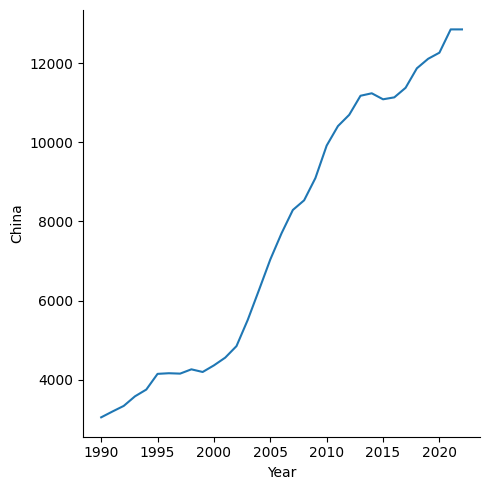

In [160]:
sns.relplot(data=df_cleaned, x="Year", y="China", kind="line")
plt.show()